# Handwritten Digits

In [1]:
import numpy as np
from scipy import stats, interpolate
import scipy.stats
from matplotlib import pyplot as plt
from tqdm import tqdm
from scipy import optimize
from scipy.optimize import curve_fit
from sklearn import datasets

We use the **MINST** database, which contains handwritten digits.

Let's upload the dataset.

In [2]:
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


#### We plot an example of data with the relative labels:

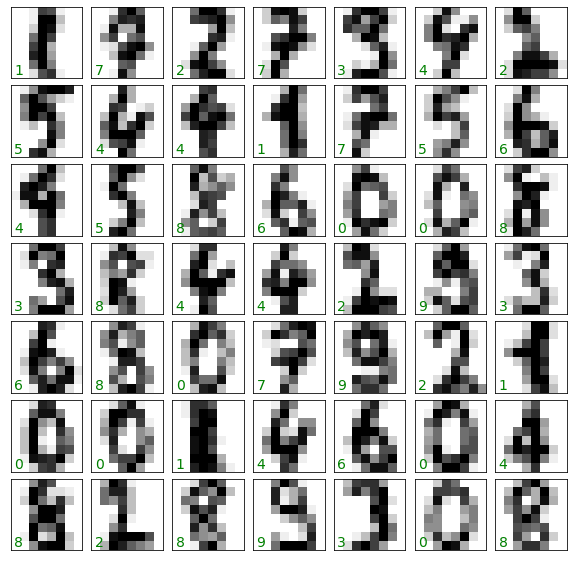

In [3]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])
    

The dataset contains 1797 samples, each of them is composed by the value of a pixel in the 8x8 grid, so we have 64 dimensions.

In [4]:
print(digits.data.shape)

# The first image
print(digits.images[0])

# The data for use in our algorithms
print(digits.data[0])

# The labels
print(digits.target)
print(digits.target[0])

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]
0


## Part 1: Dimensionality reduction

Our samples have 64 dimensions, so it's hard to work with or even visualize them.

Firstly we perform an **Unsupervised learning: Dimensionality Reduction** to go from 64 to 2 dimensions.

The embedding technique that we are using is called **Isomap**. This algorithm seeks a lower-dimensional embedding which maintains geodesic distances between all points.

In [5]:
from sklearn.manifold import Isomap
embedding = Isomap(n_components=2)

X_transformed = embedding.fit_transform(digits.data)
X_transformed.shape


C:\Users\LEONARDO\anaconda3\lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\LEONARDO\anaconda3\lib\site-packages\scipy\sparse\_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

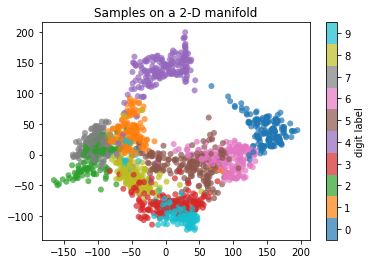

In [6]:
# Plot all of the data points in the two projected dimensions.  
# Color the points by their labels.
plt.scatter(X_transformed[:,0], X_transformed[:,1], c=digits.target, edgecolor='none', alpha=0.7, cmap= 'tab10') #discrete_cmap(10,'nipy_spectral'));
plt.title('Samples on a 2-D manifold')
plt.colorbar(label='digit label', ticks=range(10))

plt.clim(-0.5,9.5)

## Part 2: Classification

Now that we have reduced the dimensionality we procede classifing other digits through a **Supervised learning: Classification**. 

We need to train our algorithm and then test it, to do so we split the total dataset in 80% training data and 20% test data.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1437, 64)
(360, 64)
(1437,)
(360,)


We perform the classification using **LogisticRegression** from sklearn.

In [8]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=2000,solver='sag')
clf.fit(X_train, y_train)

LogisticRegression(max_iter=2000, solver='sag')

Let's compute the **accuracy score** on both training and validation data. It tells us the fraction on handwritten digits correctly identified.

In [9]:
from sklearn.metrics import accuracy_score

y_predtrain = clf.predict(X_train)
A_train= accuracy_score(y_train, y_predtrain)

y_pred = clf.predict(X_test)
A_test = accuracy_score(y_test, y_pred)

print("Accuracy score for training data: %.3f" %A_train)
print("Accuracy score for validation data: %.3f" %A_test)

Accuracy score for training data: 1.000
Accuracy score for validation data: 0.969


The classifier made some mistakes but we can not say which number just looking at the accuracy score, 
in order to do that we take into account the **Confusion Matrix**:

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 44  0  1  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]


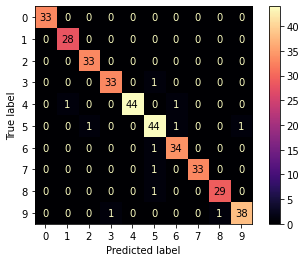

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Conf_matrix = confusion_matrix(y_test, y_pred)
print(Conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix = Conf_matrix, display_labels=digits.target_names)

disp.plot( cmap = 'magma')
plt.show()